### Import necessary libraries

In [24]:
import os
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Path to the files 

In [25]:
session1 = r"C:\Users\tiasa\Downloads\osfstorage-archive\1.0 Sessions"
demographics_file = r"C:\Users\tiasa\Downloads\osfstorage-archive\Demographic_Info.csv"

### Preprocessing

In [26]:
csv_files = glob.glob(os.path.join(session1, "*.csv"))
dataframes = []
for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8-sig') # Read the csv files
    df.columns = df.columns.str.strip()               # Clean column names
    child_id = os.path.splitext(os.path.basename(file))[0]       # Extract Child ID from filename 
    
    # Inject 'Child ID' if it's missing or all values are null
    if 'Child ID' not in df.columns or df['Child ID'].isnull().all():
        df['Child ID'] = child_id
        print(f"Injected Child ID into: {os.path.basename(file)}")
    
    # Add to list
    dataframes.append(df)

# Combine all session data into one DataFrame
all_sessions = pd.concat(dataframes, ignore_index=True, sort=False)

# Load and clean demographics CSV 
demographics = pd.read_csv(demographics_file)
demographics.columns = demographics.columns.str.strip()

# Merge sessions with demographics
merged_data = pd.merge(all_sessions, demographics, on='Child ID', how='right')

# Preview the result


print(merged_data.columns)
print(merged_data.head())


Injected Child ID into: ASLPLAY_17_Exported_05_31_24.csv
Injected Child ID into: ASLPLAY_18_Exported_05_31_24.csv
Injected Child ID into: ASLPLAY_19_Exported_05_31_24.csv
Injected Child ID into: ASLPLAY_21_Exported_05_31_24.csv
Injected Child ID into: ASLPLAY_22_Exported_05_31_24.csv
Injected Child ID into: ASLPLAY_23_Exported_05_31_24.csv
Injected Child ID into: ASLPLAY_24_Exported_05_31_24.csv
Index(['Child ID', 'Begin Time - ss.msec', 'End Time - ss.msec',
       'Duration - ss.msec', 'Adult Attention Getting Strategies',
       'Adult1 ASL Dominant hand', 'Adult1 Dominant Hand append',
       'Adult1 English', 'Adult1 NMS', 'Adult1 Non-Dominant Hand append',
       'Adult1 Non-Dominant hand', 'Adult1 free translation',
       'Child ASL Dominant hand', 'Child ASL Dominant hand append',
       'Child ASL Non-Dominant hand', 'Child Attention Getting Strategies',
       'Child NMS', 'Child Non-Dominant Hand append',
       'Child Spoken English Transcription', 'Child free translation'

### Preview the Dataset

In [27]:
print("Unique Child IDs:", sorted(merged_data['Child ID'].unique()))

Unique Child IDs: ['ASLPLAY_01', 'ASLPLAY_02', 'ASLPLAY_03', 'ASLPLAY_04', 'ASLPLAY_05', 'ASLPLAY_06', 'ASLPLAY_07', 'ASLPLAY_08', 'ASLPLAY_09', 'ASLPLAY_10', 'ASLPLAY_11', 'ASLPLAY_12', 'ASLPLAY_13', 'ASLPLAY_14', 'ASLPLAY_15', 'ASLPLAY_16', 'ASLPLAY_17', 'ASLPLAY_18', 'ASLPLAY_19', 'ASLPLAY_20', 'ASLPLAY_21', 'ASLPLAY_22', 'ASLPLAY_23', 'ASLPLAY_24']


In [28]:
print("Final merged dataset shape:", merged_data.shape)

Final merged dataset shape: (26677, 74)


In [29]:
merged_data.columns

Index(['Child ID', 'Begin Time - ss.msec', 'End Time - ss.msec',
       'Duration - ss.msec', 'Adult Attention Getting Strategies',
       'Adult1 ASL Dominant hand', 'Adult1 Dominant Hand append',
       'Adult1 English', 'Adult1 NMS', 'Adult1 Non-Dominant Hand append',
       'Adult1 Non-Dominant hand', 'Adult1 free translation',
       'Child ASL Dominant hand', 'Child ASL Dominant hand append',
       'Child ASL Non-Dominant hand', 'Child Attention Getting Strategies',
       'Child NMS', 'Child Non-Dominant Hand append',
       'Child Spoken English Transcription', 'Child free translation',
       'EYE GAZE (adult)', 'EYE GAZE (child)', 'Object touch (adult) Left',
       'Object touch (adult) Right', 'Object touch (child) Left',
       'Object touch (child) Right',
       'Adult Attention Getting Strategies Append',
       'Child Attention Getting Strategies Append',
       'Child Spoken English append', 'EYE GAZE (adult) Append',
       'EYE GAZE (child) Append', 'Object touch (

In [30]:
merged_data.head(15)

,Child ID,Begin Time - ss.msec,End Time - ss.msec,Duration - ss.msec,Adult Attention Getting Strategies,Adult1 ASL Dominant hand,Adult1 Dominant Hand append,Adult1 English,Adult1 NMS,Adult1 Non-Dominant Hand append,...,CSET Ref2,PSET Ref2,CSET Noun2,Adult2 comments,Adult2 Attention Getting Strategies,Object touch (adult2) Left Append,Object touch (adult2) Right Append,Child_Age,Parent_Deaf,Voice_Coded
0,ASLPLAY_01,60.568,62.521,1.953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
1,ASLPLAY_01,60.569,60.644,0.075,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
2,ASLPLAY_01,60.569,60.649,0.080,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
3,ASLPLAY_01,60.569,67.380,6.811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
4,ASLPLAY_01,60.649,61.001,0.352,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
5,ASLPLAY_01,61.001,64.421,3.420,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
6,ASLPLAY_01,62.422,67.504,5.082,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
7,ASLPLAY_01,62.570,64.599,2.029,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
8,ASLPLAY_01,62.831,63.075,0.244,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1
9,ASLPLAY_01,62.832,63.075,0.243,Tapping Object,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1


### Feature Engineering

In [39]:
asl_columns = [
    'Child ASL Dominant hand',
    'Child ASL Non-Dominant hand',
    'Child ASL Dominant hand pho',
    'Child ASL Non-Dominant pho',
    'Child NMS',
    'Child ASL feedback',
    'Child free translation'
]

# Count non-null values across these columns per row
merged_data['ASL_Activity'] = merged_data[asl_columns].notna().sum(axis=1)

# Sum by Child ID
asl_scores = merged_data.groupby('Child ID')['ASL_Activity'].sum().reset_index()
asl_scores = asl_scores.rename(columns={'ASL_Activity': 'ASL_Score'})

merged_data = pd.merge(merged_data, asl_scores, on='Child ID', how='left')

print(asl_scores.sort_values(by='ASL_Score', ascending=False))
merged_data

      Child ID  ASL_Score
15  ASLPLAY_16        189
5   ASLPLAY_06        137
14  ASLPLAY_15         97
19  ASLPLAY_20         78
12  ASLPLAY_13         59
2   ASLPLAY_03         58
11  ASLPLAY_12         47
7   ASLPLAY_08         44
6   ASLPLAY_07         37
13  ASLPLAY_14         36
9   ASLPLAY_10         23
1   ASLPLAY_02         20
10  ASLPLAY_11         17
8   ASLPLAY_09         12
3   ASLPLAY_04         12
22  ASLPLAY_23          0
21  ASLPLAY_22          0
20  ASLPLAY_21          0
0   ASLPLAY_01          0
18  ASLPLAY_19          0
17  ASLPLAY_18          0
16  ASLPLAY_17          0
4   ASLPLAY_05          0
23  ASLPLAY_24          0


,Child ID,Begin Time - ss.msec,End Time - ss.msec,Duration - ss.msec,Adult Attention Getting Strategies,Adult1 ASL Dominant hand,Adult1 Dominant Hand append,Adult1 English,Adult1 NMS,Adult1 Non-Dominant Hand append,...,CSET Noun2,Adult2 comments,Adult2 Attention Getting Strategies,Object touch (adult2) Left Append,Object touch (adult2) Right Append,Child_Age,Parent_Deaf,Voice_Coded,ASL_Activity,ASL_Score
0,ASLPLAY_01,60.568,62.521,1.953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,0,1,0,0
1,ASLPLAY_01,60.569,60.644,0.075,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,0,1,0,0
2,ASLPLAY_01,60.569,60.649,0.080,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,0,1,0,0
3,ASLPLAY_01,60.569,67.380,6.811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,0,1,0,0
4,ASLPLAY_01,60.649,61.001,0.352,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26672,ASLPLAY_20,780.128,780.253,0.125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,56,1,1,0,78
26673,ASLPLAY_21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59,1,0,0,0
26674,ASLPLAY_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59,1,0,0,0
26675,ASLPLAY_23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59,1,0,0,0


### EDA

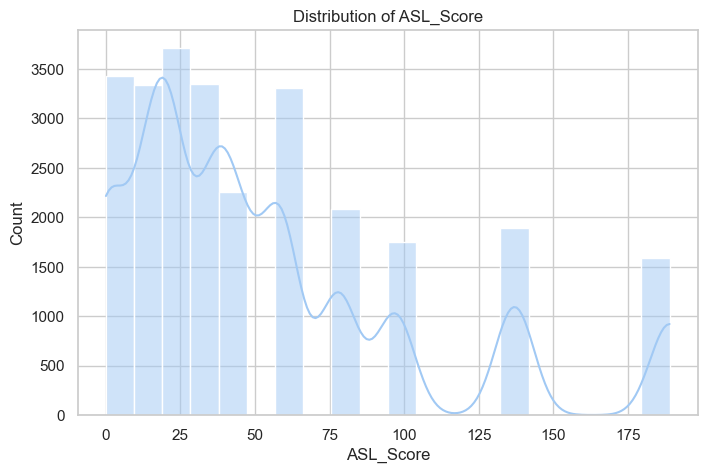

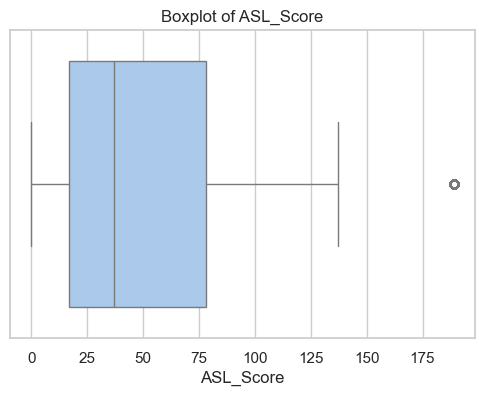

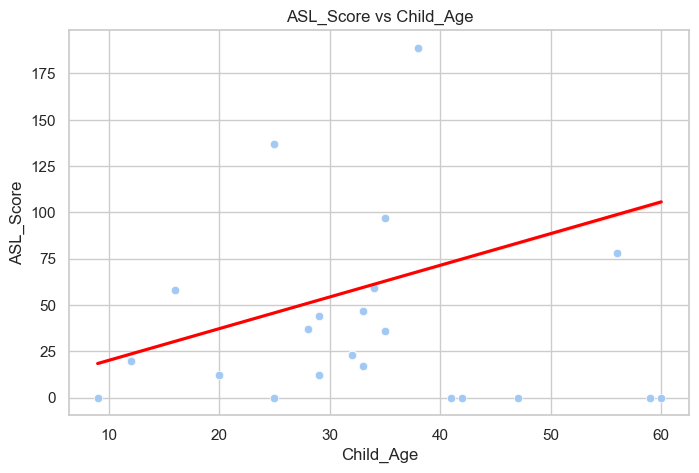

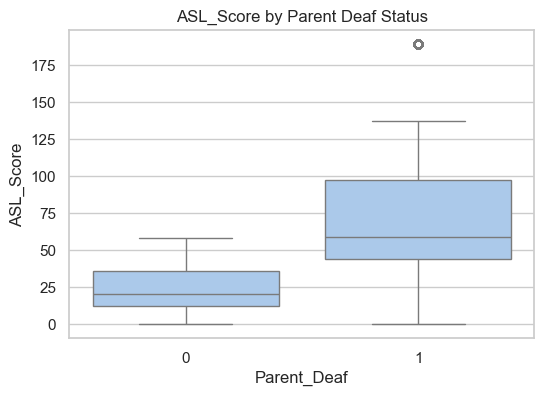

In [44]:
# Set up seaborn style
sns.set(style='whitegrid', palette='pastel')

# Distribution of ASL_Score 
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['ASL_Score'], kde=True, bins=20)
plt.title("Distribution of ASL_Score")
plt.xlabel("ASL_Score")
plt.ylabel("Count")
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=merged_data['ASL_Score'])
plt.title("Boxplot of ASL_Score")
plt.show()

# ASL_Score vs Child Age (Continuous) 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Child_Age', y='ASL_Score')
sns.regplot(data=merged_data, x='Child_Age', y='ASL_Score', scatter=False, color='red')
plt.title("ASL_Score vs Child_Age")
plt.show()


# ASL_Score by Parent Deaf status 
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_data, x='Parent_Deaf', y='ASL_Score')
plt.title("ASL_Score by Parent Deaf Status")
plt.show()

